In [1]:
from fastai import *
from fastai.vision import *

## Data

path to the images on disk

In [3]:
path = Path('data/')

In [4]:
tfms = get_transforms()

- resize images to 224 * 224
- divide dataset into training and validation set
- normalize images 

In [6]:
np.random.seed(672)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=224, ds_tfms=tfms).normalize(imagenet_stats)

show a sample of the images

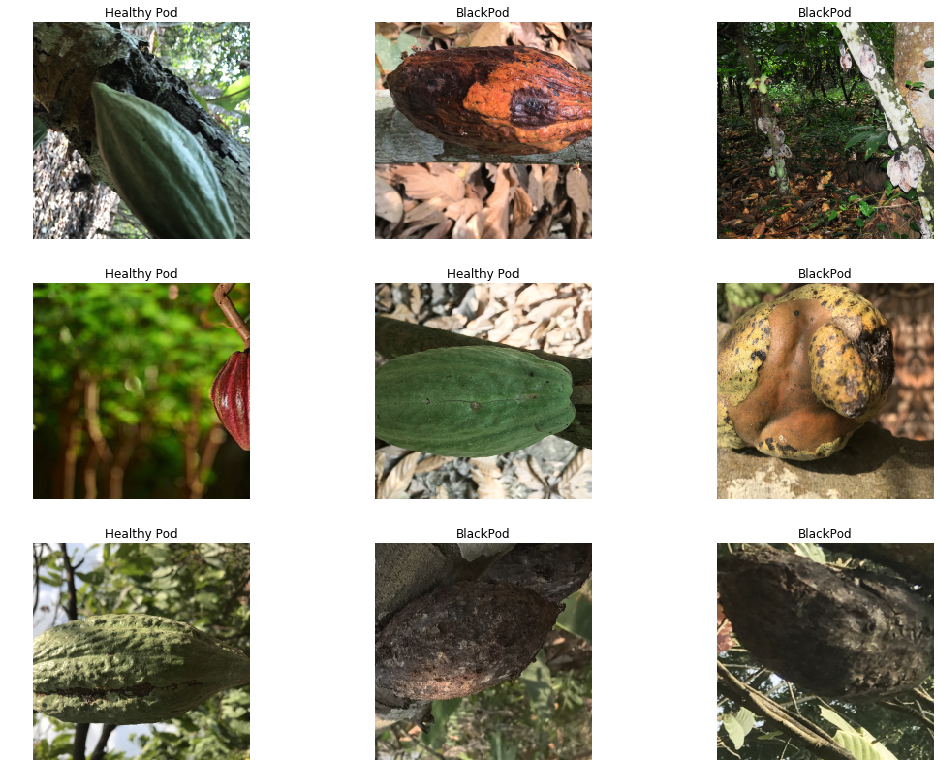

In [8]:
data.show_batch(3, figsize=(15, 11))

# Model

create the convolutional neural network

In [7]:
learn = cnn_learner(data, models.densenet121, metrics=accuracy)

/opt/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


use learning rate finder to find the optimum learning rate

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


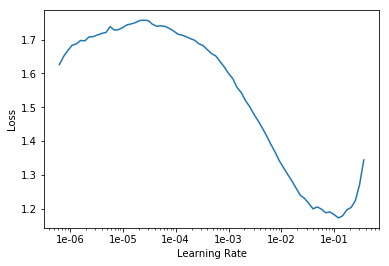

In [9]:
learn.recorder.plot()

perform feature extraction for 10 epochs

In [10]:
lr = 5e-3
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.229346,0.759369,0.762025,03:28
1,0.877922,0.605945,0.772152,03:28
2,0.669234,0.538059,0.817722,03:27
3,0.523888,0.495108,0.822785,03:27
4,0.417138,0.477901,0.860759,03:26
5,0.341797,0.499569,0.855696,03:27
6,0.275138,0.511190,0.865823,03:26
7,0.239979,0.462283,0.873418,03:29
8,0.201587,0.465247,0.875949,03:26
9,0.175706,0.467071,0.870886,03:27


In [17]:
learn.save('stage-1-dn121')

In [18]:
learn.export('dn121a.pkl')

In [6]:
learn.load('dn121b');

In [25]:
img = open_image('p1.jpg')

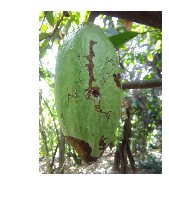

In [26]:
img.show()

In [22]:
data.classes

['Black Pod', 'Healthy Pod', 'Pest Infested Pod']

In [27]:
pred = learn.predict(img)

In [28]:
pred[0]

Category Pest Infested Pod

In [29]:
top_probs, top_classes = pred[2].topk(1)

In [30]:
top_probs.item()

0.9506826400756836

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


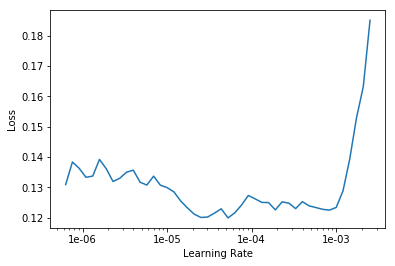

In [21]:
learn.recorder.plot()

fine tune the model for 5 epochs

In [22]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.141587,0.475586,0.870886,03:28
1,0.149851,0.550899,0.858228,03:28
2,0.133092,0.470544,0.883544,03:28
3,0.114810,0.497083,0.868354,03:32
4,0.095105,0.470810,0.875949,03:28


In [23]:
learn.save('dn121b')

In [24]:
learn.export('final.pkl')

plot training and validation loss

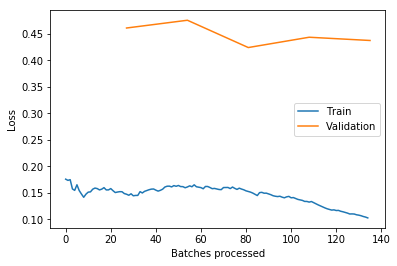

In [20]:
learn.recorder.plot_losses()

In [1]:
len(data.train_ds), len(data.valid_ds)

NameError: name 'data' is not defined